# ICS 434: DATA SCIENCE FUNDAMENTALS

## Exploring Data Analysis

---

In [15]:
# Bundle all imports in the first cell of a Notebook
import pandas as pd
import numpy as np


### Reading a File in Pandas

* Support for a variety of filetypes
* Support for a plethora of file sources:
    * File system or buffer
    * URL: http, ftp, s3, gs, and file (file://localhost/...)

* Various options to change default behavior. E.g.: 
  * Include or ignore the header
  * Specify a desired separator 
  * Add or modify column names,
  * Specify the data types,
  * Specify the column to index on.
  * etc.
* See documentation for more details https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
        

In [5]:
spending_df = pd.read_csv("data/spending_10k.csv", index_col='unique_id')
spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
NX531425,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.24
QG879256,1699761833,FAMILY PRACTICE,ALLOPURINOL,30,715.76
FW363228,1538148804,INTERNAL MEDICINE,LOSARTAN POTASSIUM,146,1056.47
WD733417,1730200619,PSYCHIATRY,OLANZAPINE,13,28226.97
XW149832,1023116894,FAMILY PRACTICE,PRAVASTATIN SODIUM,348,8199.48


### Exploring Your Data

* Data analysis begins with exploring the data.
Various levels of data exploration can be performed. E.g.:
  * How many records are there? (high-level view of the data)
  * How many columns are there? (high-level view of the data)
  * What is a column's average and standard deviation? (intermediate-level view of the data)
  * What are the number of unique values in a column? (intermediate-level view of the data)
    * How many of each are there? 
  * What are the distributions of the data in various columns? (low-level view of the data)
  * etc.
  
* We will explore functions to cover interesting use cases.

### Pandas Functionality

* `DataFrames` have a number of useful features implemented as:
  * Attributes that pertain to features (constants of the data)
    * Number of rows, type of a given column `x`
  * Methods to act on the data
    * Non-transformative functions, e.g.:
      * Give me the maximum value in column `x`
    * transformative (but not in place) functions, e.g.:
      * Remove column `x`, sort by column `x`, filter values that are less than some value in column `x`
* Functions to apply some custom functionality (your own function) to the data. E.g.:
  * Normalize the values in a column `x` by subtracting the mean or the column and dividing by the standard deviation.

### Attributes

* If you have loaded a table, you probably want to see how the data is structured 
  * The following three attributes are useful to get a sense of the structure of your data:  
  
| Attribute |Description|
|:----------|-----------|
| `shape`| Return a `tuple` representing the dimensionality of the DataFrame |
| `size` | Return an `int` representing the number of elements in this object  |
| `dtypes` | Return the data types in the DataFrame |

* Recall that the syntax for accessing a `DataFrame`'s attribute is:

```python 
ObjectName.attributeName
```

Ex.: 

```python 
spending_df.shape
```


### Attributes

* If you have loaded a table, you probably want to see how the data is structured 
  * The following three attributes are useful to get a sense of the structure of your data:  
  
| Attribute |Description|
|:----------|-----------|
| `shape`| Return a `tuple` representing the dimensionality of the DataFrame |
| `size` | Return an `int` representing the number of elements in this object  |
| `dtypes` | Return the data types in the DataFrame |



* Recall that the syntax for accessing a `DataFrame`'s attribute is:

```python 
ObjectName.attributeName
```

Ex.: 

```python 
spending_df.shape
```


In [3]:
spending_df.shape

(10000, 5)

In [4]:
spending_df.size

50000

In [5]:
spending_df.head(10)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
NX531425,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.24
QG879256,1699761833,FAMILY PRACTICE,ALLOPURINOL,30,715.76
FW363228,1538148804,INTERNAL MEDICINE,LOSARTAN POTASSIUM,146,1056.47
WD733417,1730200619,PSYCHIATRY,OLANZAPINE,13,28226.97
XW149832,1023116894,FAMILY PRACTICE,PRAVASTATIN SODIUM,348,8199.48
QT485324,1952359671,FAMILY PRACTICE,HYDROCHLOROTHIAZIDE,57,247.01
NA293426,1841235223,FAMILY PRACTICE,SEVELAMER CARBONATE,11,4869.32
IF945618,1326095662,INTERNAL MEDICINE,FLUTICASONE/SALMETEROL,20,7832.46
PH384257,1821126830,HEMATOLOGY/ONCOLOGY,ZOLPIDEM TARTRATE,14,65.21


### Inspecting Data Types

* `DataFrame` columns contain data, whose type is inferred by Pandas

* Some operations in Pandas are only valid on certain types. E.g.:
    * Compute average on `spending` column is valid
    * Compute the median on the `medication` column is invalid

 * Inferring `doctor_id` as a number that can be averaged is perhaps wrong
   * Perhaps should be set as a string (text) instead

### Inspecting Data Types -- Cont'd

* `dtypes` field holds the data type of each column of the DataFrame

* `dtype` field holds the data type for a Series
  * Holds the data type in that column 

```python
>>> spending_df.dtypes
doctor_id             int64
specialty            object
medication           object
nb_beneficiaries      int64
spending            float64
dtype: object
```


In [6]:
spending_df.dtypes

doctor_id             int64
specialty            object
medication           object
nb_beneficiaries      int64
spending            float64
dtype: object

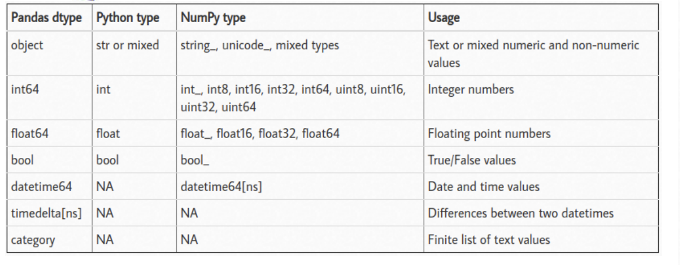

### Methods

* Python methods are functions that are accessible via an object instance.
  * Apply to the object that calls them.
  
Syntax: 
```python
ObjectName.methodName()
```

* DataFrame have many built-in methods to summarize our data. Ex:

| Method|Description|
|:----------|-----------|
| `head()`| Return first n rows |
| `tail()` | Return last n rows |
| `min()`, `max()` | Computes the numeric or alphanumeric min, max|
| `sum()`, `mean()`, `std()`, `var()`   | Computes the column-wise sum, mean, standard deviation and variance in a `Series` or `DataFrame`|
| `count()` |  Returns the number of non-NaN values in the in a `Series` or `DataFrame`|
| `value_counts()` |  Returns the frequency for each value in the `Series`|
| `describe()` | Computes column-wise statistics|

* There are numerous other functions to the explore data. Those will be covered throughout the semester

In [7]:
med = spending_df["medication"]

# recal that shape returns a tuple
med.shape

(10000,)

In [8]:
med = spending_df["medication"]
med.count()

10000

In [9]:
# frequency of occurence 
med.value_counts()

LEVOTHYROXINE SODIUM        150
GABAPENTIN                  126
POTASSIUM CHLORIDE          125
METFORMIN HCL               118
LISINOPRIL                  118
                           ... 
AMBRISENTAN                   1
PROMETHAZINE HCL/CODEINE      1
CYPROHEPTADINE HCL            1
CIMETIDINE                    1
ETHOTOIN                      1
Name: medication, Length: 617, dtype: int64

### DataFrame Axes

* Computing statistics on the data is a critical aspect of exploratory data analysis

* Provides valuable information about the data

  * E.g., what medications are most prescribed, which doctors or specialty produce most prescriptions, what is the total of opiate prescriptions per state, etc.

* We normally think of computations on columns. What if you want to perform a computation row-wise?

  * Having another set of functions would be redundant and a bad idea

    * Bad idea: `compute_avg_row()` and `compute_avg_col()`, `compute_std_row()` and `compute_std_col()`, etc.

* Instead of duplicating functionality, Python uses the concept of `axis`

In [3]:
x = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
x.sum?

### DataFrame Axes -- Cont'd



* For instance, the methods `sum()`, `min()`, `max()`, etc. can all be applied row- or column-wise.
  * Note that they have a parameter called `axis`.
    * Default is None, which means apply to each row, column-wise.
    * This concepts may be a bit confusing but you will get ample opportunities to explore it.

 
```python
spending_df.sum()

Signature: spending_df.sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs)

Docstring:
Return the sum of the values over the requested axis
```


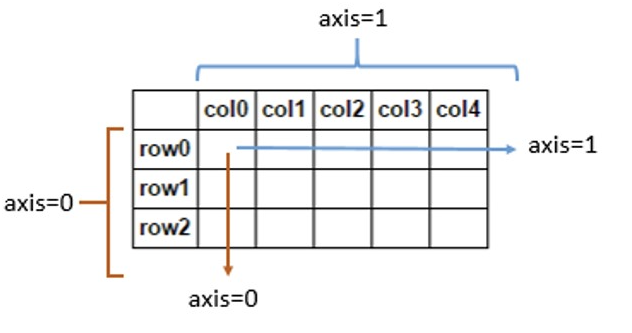
`image from: https://stackoverflow.com/questions/39283339/what-is-the-meaning-of-axis-attribute-in-a-pandas-dataframe`

### Descriptive Statistics

* We'll explore some more functions on simple, manually created `DataFrame`.
  * Making a test dataset is always useful when not sure how something works after reading the documentation.   
  
```python
>>> df = pd.DataFrame({'A':[0, 1, 2], 'B':[5, 6, 7]})
>>> df
   A  B
0  0  5
1  1  6
2  2  7
```

### Descriptive Statistics -- Cont'd 

* As discussed, the method `mean()` work column-wise by default.

``` python
>>> df.mean()
A    1.0
B    6.0
dtype: float64
```

* You will see that the result is a `Series`.

### Descriptive Statistics -- Cont'd 

* To compute the row-wise mean, we need to change the `axis` to 1
 
```python
>>> df.mean(axis=1)
0    2.5
1    3.5
2    4.5
dtype: float64
```

### Descriptive Statistics -- Cont'd 

* Descriptive statistics can also be applied to a `Series` object
  * If you are only interested in a subset of the rows or columns of the `DataFrame`
  * Use the subset operator `[ ]` to extract the `Series` and the function to it.

```python
>>> df['A'].mean()
1.0
```

### Missing Values

* In actual data Missing values in a table can occur under different forms
  * Space
  * Empty string
  * Some predetermine identifier: ex. MISSING, NOVAL, etc.
* These values can often skew or "break the analysis"
    * NOVAL in a column with number results on the whole column being converted to Object
* Custom handling of the missing values is often necessary.
  * Often involved turning those values into Pandas' `NaN` equivalent
* In pandas, `NaN` represents a Not a Number, i.e., a lack of value.
  * NaNs represent undefined or "unrepresentable" values
  * It is not 0, an empty string, or the boolean False. 


In [16]:
np.NaN

nan

In [29]:
np.NaN == 0, np.NaN < 0,  np.NaN > 0 

(False, False, False)

In [30]:
np.NaN == np.NaN

False

In [32]:
### NumPy, for efficiency reasons, uses the same object in memory for its NaN values.
### The `is` operator in Python checks for object identity, i.e., whether they are the same object in memory.

np.NaN is np.NaN

True

### Count and Missing Values

 * How do summary operations handle emtpy (missing) values?
  * As discussed we explore using a small dataset

```python
>>> na_df = pd.DataFrame({"Col A": [np.NaN, np.NaN], "Col B": [np.NaN, np.NaN]}) 
>>> na_df

    Col A   Col B
0	NaN	    NaN
1	NaN	    NaN

>>> na_df.shape
(2, 2)

>>> na_df.size
4
```



### Count and Missing Values -- Cont'd

* Pandas reports that the `DataFrame` contains 2 rows and 2 columns with a total of 4 values.
  * We know that there are actually no real data in this `DataFrame`.
  
* Rather than use `shape` and `size`, we can instead use the built-in `count()` method.
  * It automatically excludes missing values.
  
* An easy way to assess the level of missing values in your data.

In [38]:
df = pd.DataFrame({"Col A": [np.NaN, np.NaN], "Col B": [np.NaN, np.NaN]}) 
df

,Col A,Col B
0,NaN,NaN
1,NaN,NaN


In [39]:
df.count()

Col A    0
Col B    0
dtype: int64

### Count and Missing Values -- Cont'd

* We'll use another example, `spending_missing_values.csv`, which was specifically constructed to have missing values.

```python
>>> spending_missing_values_df = pd.read_csv('data/spending_missing_values.csv', 
                                               index_col='unique_id', 
                                               na_values=['Null'])
```

- The method `count()` counts values by default column-wise.
  - The method has the optional `axis` parameter with a default of `axis=0`, or equivalently `axis='rows'` or `axis='index'`.
  - This concept is prevalent when working with Pandas. So please remember the meaning of `axis=0` and `axis=1`


### Counting Missing Values in Columns

```python
>>> spending_missing_values_df.count()
doctor_id           54
specialty           48
medication          53
nb_beneficiaries    50
spending            50
dtype: int64
```

* Columns contain variable number of missing values



#### Question:

  * Can you think of use case which would require using `count(axis = 1)`?

### Counting Missing Values in Columns

```python
>>> spending_missing_values_df.count()
doctor_id           54
specialty           48
medication          53
nb_beneficiaries    50
spending            50
dtype: int64
```

* Columns contain variable number of missing values

In [43]:
x = pd.read_csv('data/spending_missing_values.csv', index_col='unique_id')
x.iloc[5]

doctor_id                          1689080749
specialty           INTERVENTIONAL CARDIOLOGY
medication                     SERTRALINE HCL
nb_beneficiaries                         26.0
spending                                 Null
Name: WO822855, dtype: object

In [44]:
x = pd.read_csv('data/spending_missing_values.csv', index_col='unique_id')
x.iloc[5, -1]

'Null'

In [45]:
x = pd.read_csv('data/spending_missing_values.csv', index_col='unique_id')
type(x.iloc[5, -1])

str

In [47]:
spending_missing_values_df = pd.read_csv('data/spending_missing_values.csv', 
                                         index_col='unique_id', 
                                         na_values=['Null'])
spending_missing_values_df.iloc[5]

doctor_id                          1689080749
specialty           INTERVENTIONAL CARDIOLOGY
medication                     SERTRALINE HCL
nb_beneficiaries                         26.0
spending                                  NaN
Name: WO822855, dtype: object

In [48]:
print(spending_missing_values_df.shape)
print("----------")
spending_missing_values_df.count()

(54, 5)
----------


doctor_id           54
specialty           48
medication          53
nb_beneficiaries    50
spending            50
dtype: int64

### The Describe Method

* The `describe()` summarizes the values in columns in `DataFrame`
  * By default, only numerical values are considered
  * Behavior can be modified by setting the `include` parameter to 'all'
  

In [49]:
spending_df.describe()

,doctor_id,nb_beneficiaries,spending
count,1.000000e+04,10000.000000,10000.000000
mean,1.503766e+09,50.918300,4333.838595
std,2.874269e+08,86.493443,21915.925814
min,1.003010e+09,11.000000,15.020000
25%,1.255580e+09,15.000000,253.237500
50%,1.508818e+09,24.000000,677.970000
75%,1.750467e+09,50.000000,2442.955000
max,1.992999e+09,1987.000000,892027.000000


In [21]:
# For options on handling scientific notation, see the following
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/ 

spending_df.describe(include='all')

,doctor_id,specialty,medication,nb_beneficiaries,spending
count,1.000000e+04,10000,10000,10000.000000,10000.000000
unique,NaN,75,617,NaN,NaN
top,NaN,INTERNAL MEDICINE,LEVOTHYROXINE SODIUM,NaN,NaN
freq,NaN,3060,150,NaN,NaN
mean,1.503766e+09,NaN,NaN,50.918300,4333.838595
std,2.874269e+08,NaN,NaN,86.493443,21915.925814
min,1.003010e+09,NaN,NaN,11.000000,15.020000
25%,1.255580e+09,NaN,NaN,15.000000,253.237500
50%,1.508818e+09,NaN,NaN,24.000000,677.970000
75%,1.750467e+09,NaN,NaN,50.000000,2442.955000


### Method Chaining

* Successive application of methods onto an object can be chained and executed in a single line of code

* The syntax for method chaining is the following:

```python
`object.method_1().method_2()...`
```

* We'll demonstrate with functions we haven't covered but that are fairly intuitive
  * `sort_values`: sort on a column value
  * `sample`: samples (selects randomly) a given number of items  

In [22]:

spending_sorted_df = spending_df.sort_values(by="spending", ascending=False)
spending_sorted_top_10_df = spending_sorted_df.head(10)

spending_sorted_top_10_df

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
RU995312,1467442392,PULMONARY DISEASE,AMBRISENTAN,118,892027.00
SJ341179,1780895854,GASTROENTEROLOGY,LEDIPASVIR/SOFOSBUVIR,27,855440.65
HG989315,1992757181,DIAGNOSTIC RADIOLOGY,TERIPARATIDE,285,564901.05
ZE579249,1457375321,NEUROLOGY,GLATIRAMER ACETATE,89,564109.04
UF412652,1891767307,PEDIATRIC MEDICINE,GLYCEROL PHENYLBUTYRATE,12,480637.52
HI666266,1144277294,NEPHROLOGY,SEVELAMER CARBONATE,242,446874.49
JM425012,1851423701,GASTROENTEROLOGY,LEDIPASVIR/SOFOSBUVIR,14,445448.40
RE720840,1801196829,NURSE PRACTITIONER,CRIZOTINIB,29,385275.65
GJ496150,1851379762,NURSE PRACTITIONER,SEVELAMER CARBONATE,218,343489.69


In [23]:
spending_sorted_top_10_df.sample(2)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
RU995312,1467442392,PULMONARY DISEASE,AMBRISENTAN,118,892027.00
SJ341179,1780895854,GASTROENTEROLOGY,LEDIPASVIR/SOFOSBUVIR,27,855440.65


In [24]:
spending_df.sort_values(by="spending", ascending=False).head(10).sample(2)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
GJ496150,1851379762,NURSE PRACTITIONER,SEVELAMER CARBONATE,218,343489.69
RU995312,1467442392,PULMONARY DISEASE,AMBRISENTAN,118,892027.00


### Chaining Methods Syntax


* Chained methods are often written across multiple lines to facilitate reading.

* Python requires a specific syntax to break chained methods across multiple lines.
  * For example, the following generates an error as Python expects instruction to end at the end of the line.
  * Unlike, for instance, JS, which expects expressions to end when at the `;` character.
  
```python
spending_df.
            sort_values(by="spending", ascending=False).
            head(10).
            sample(2)
```            

In [51]:
# The following will generate an error!
spending_df.
            sort_values(by="spending", ascending=False).
            head(10).
            sample(2)

SyntaxError: invalid syntax (1995992832.py, line 2)

In [26]:
(spending_df.
            sort_values(by="spending", ascending=False).
            head(10).
            sample(2))

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
JM425012,1851423701,GASTROENTEROLOGY,LEDIPASVIR/SOFOSBUVIR,14,445448.4
RU995312,1467442392,PULMONARY DISEASE,AMBRISENTAN,118,892027.0


### Sorting


* Ordering data is often critical during exploration 

 * Example, for detecting anomalies
 * Identifying scales and ranges of data (min and max transactions)
 * Identifying important categories
     

### Sorting by Index


* We can sort either:
  * Lexicographically by row index `sort_index()`
   * Since there is only one index, the method does not have any required parameters
  * Lexicographically on a column value `sort_values()`
    * Since a `DataFrame` may have many columns, you need to explicitly specify the column(s) you want to sort on

* Sorting is by default in ascending order
  * Behavior can be modified using `ascending` parameter


In [27]:
spending_df.sort_index()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
AA137628,1619994506,INTERNAL MEDICINE,PRAVASTATIN SODIUM,17,722.11
AA150698,1124243563,CARDIOLOGY,FENOFIBRATE NANOCRYSTALLIZED,29,1327.06
AA256462,1780610477,INTERNAL MEDICINE,FINASTERIDE,81,1508.39
AA309915,1760896161,FAMILY PRACTICE,PRAVASTATIN SODIUM,11,241.33
AA316473,1023104098,INTERNAL MEDICINE,WARFARIN SODIUM,46,529.07
...,...,...,...,...,...
ZZ769373,1245660554,NURSE PRACTITIONER,LISINOPRIL,18,118.82
ZZ814526,1982960043,PHYSICIAN ASSISTANT,METOPROLOL TARTRATE,13,69.52
ZZ861557,1457358053,CARDIOLOGY,WARFARIN SODIUM,26,254.48


In [28]:
spending_df.sort_values('spending', ascending=False)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
RU995312,1467442392,PULMONARY DISEASE,AMBRISENTAN,118,892027.00
SJ341179,1780895854,GASTROENTEROLOGY,LEDIPASVIR/SOFOSBUVIR,27,855440.65
HG989315,1992757181,DIAGNOSTIC RADIOLOGY,TERIPARATIDE,285,564901.05
ZE579249,1457375321,NEUROLOGY,GLATIRAMER ACETATE,89,564109.04
UF412652,1891767307,PEDIATRIC MEDICINE,GLYCEROL PHENYLBUTYRATE,12,480637.52
...,...,...,...,...,...
OD445990,1841366820,INTERNAL MEDICINE,FUROSEMIDE,13,19.90
TX420809,1801032297,ADDICTION MEDICINE,LORAZEPAM,14,19.56
MR117563,1629180708,PHYSICIAN ASSISTANT,SIMVASTATIN,11,16.72


### (Some) Data Visualization 

* There is more than enough content to justify semester-long courses on the topic
  * There is, in fact, a semester-long course on the topic!

* `Pandas` provides elementary functionality to produce basic plots 
  * Ideal for primary data exploration for getting to know your data
    * As opposed to formulating or confirming a hypothesis


### The `DataFrame` Plots

* Pandas has methods for the following types of plots:

| Kind |Description|
|:----------|-----------|
| `line`| Line plot (default) |
| `bar` | Vertical bar plot  |
| `barh` | Horizontal bar plot |
| `hist` | Histogram |
| `box` | Boxplot  |
| `kde` | Kernel Density Estimation plot |
| `area` | Area plot |
| `pie` | Pie plot |
| `scatter` | Scatter plot |
| `hexbin` | Hexbin plot |


### The `DataFrame` Plots -- Cont'd

* Plots require different preparations based on what you would like to show
 
* Most data require numerical axes, others require categorical axes
 * Some take information on one axis and infer the second
   * Ex. Histograms, pdf, etc.


In [54]:
spending_by_specialty_df = pd.read_csv('data/spending_by_specialty.csv', index_col='specialty')
spending_by_specialty_df.head()

,spending
specialty,
ADDICTION MEDICINE,920.06
ALLERGY/IMMUNOLOGY,189174.06
ANESTHESIOLOGY,142804.73
CARDIAC ELECTROPHYSIOLOGY,225543.62
CARDIAC SURGERY,12432.92


<Axes: xlabel='specialty'>

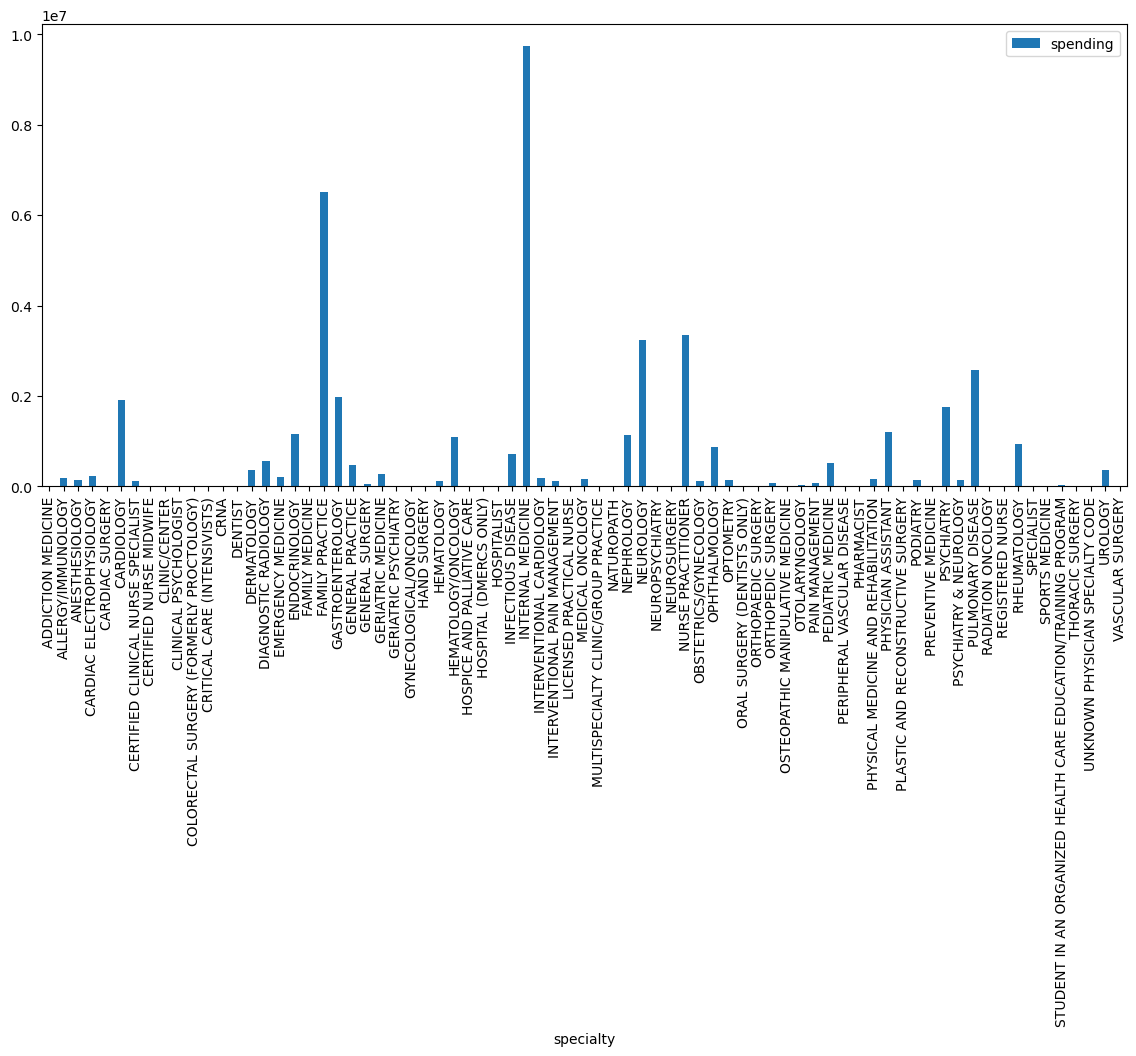

In [55]:
spending_by_specialty_df.plot(kind='bar', figsize=(14,6))

<Axes: xlabel='specialty'>

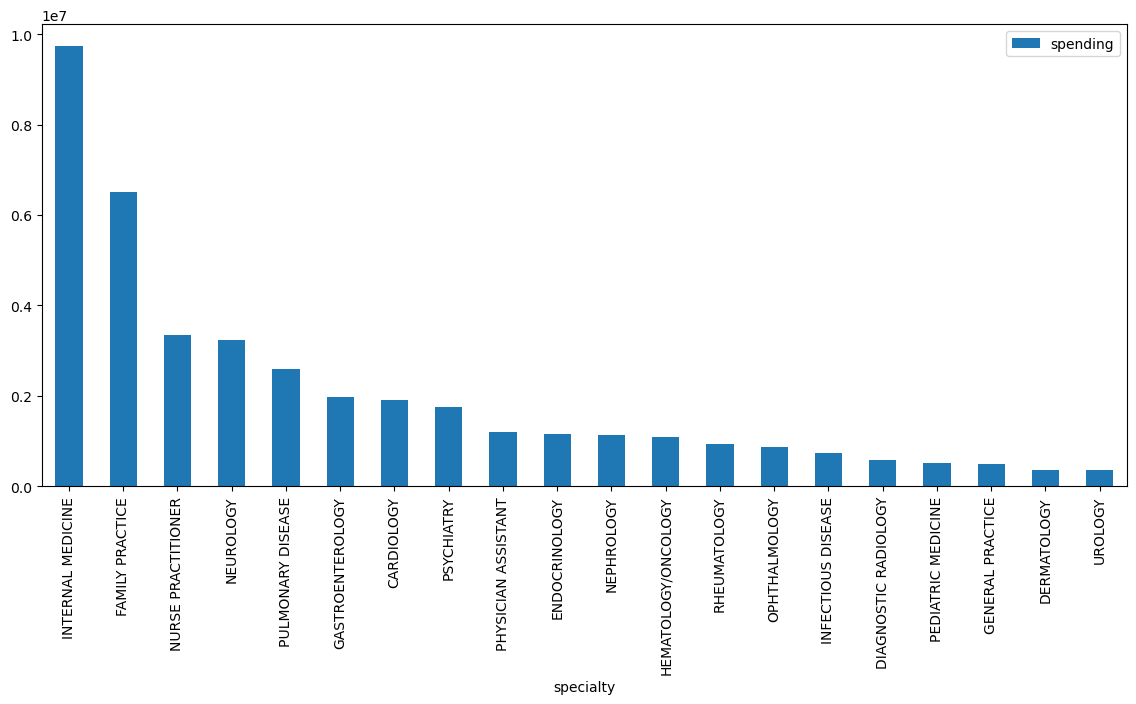

In [58]:
spending_by_specialty_df.sort_values('spending', ascending=False).head(n=20).plot(kind='bar', figsize=(14,6))

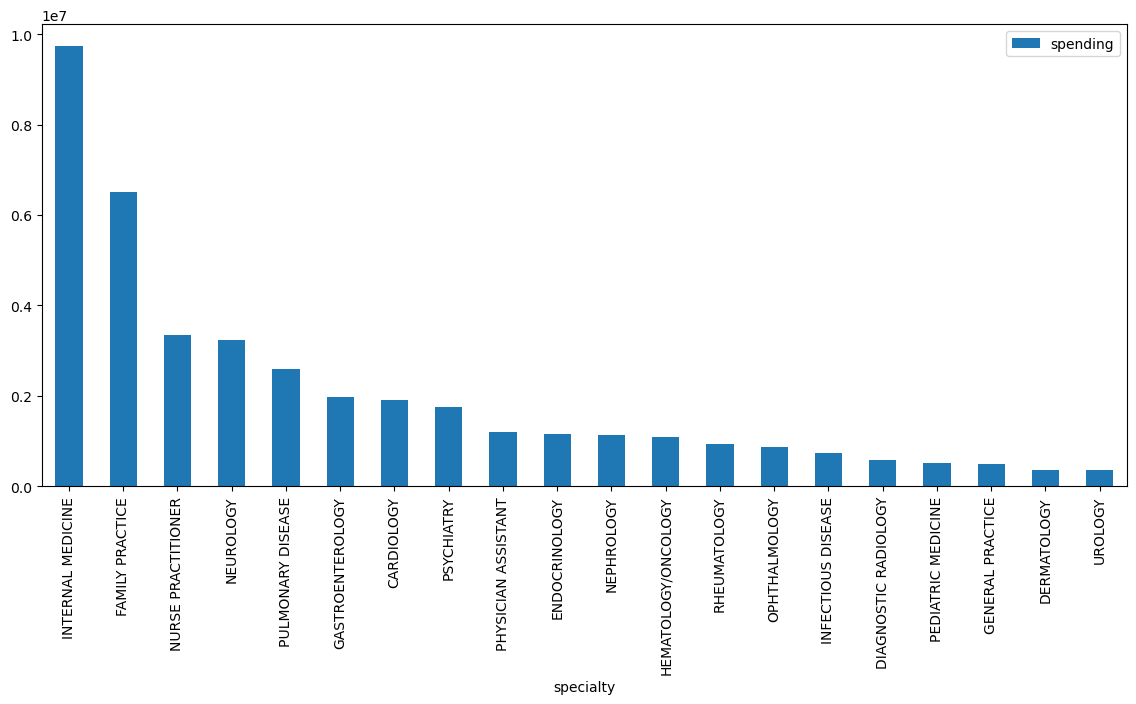

In [57]:
_ = spending_by_specialty_df.sort_values('spending', ascending=False).head(n=20).plot(kind='bar', figsize=(14,6))

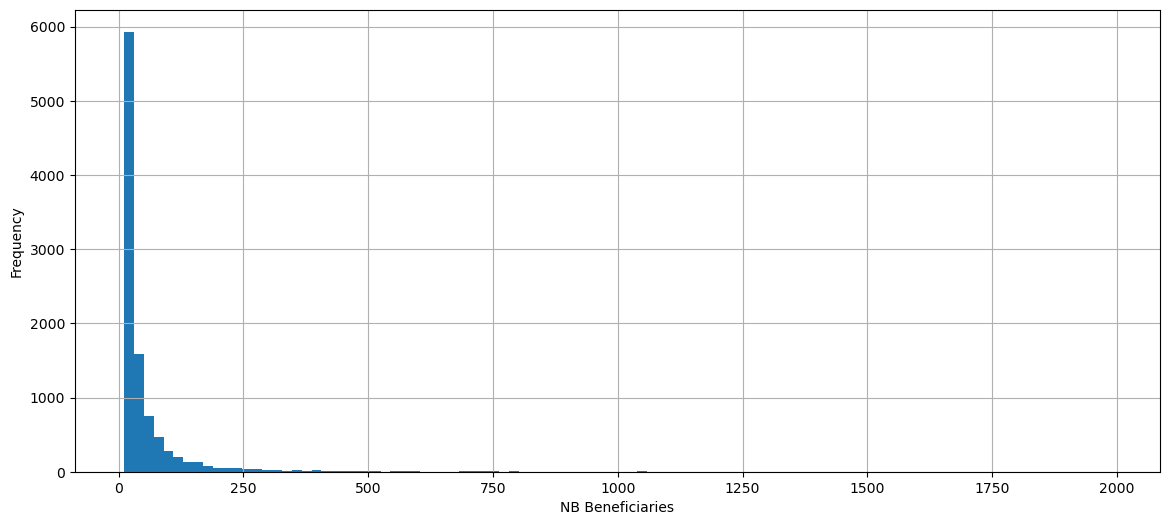

In [60]:
ax = spending_df["nb_beneficiaries"].hist(bins=100, figsize=(14,6))
_ = ax.set_xlabel("NB Beneficiaries")
_ = ax.set_ylabel("Frequency")

### Plot Examples
* You can make some really neat plots using `Pandas` 
  * See the [Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) section of the `Pandas` documentation 
* We will introduce and mainly use the [matplotlib](https://matplotlib.org/stable/gallery/) library